In [13]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [4]:
X_train = np.linspace(-1 ,1 ,20)

In [9]:
y_train = np.array([
    -0.6561, -0.3099, -0.59035, -0.50855, -0.285,
    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
    0.5524, 0.23115, 0.20835, 0.4211, 0.60485
])


In [6]:
X_test = np.linspace(-1,1,20)

In [10]:
y_test = np.array([
    -0.69415, -0.451, -0.43005, -0.4484, -0.1475,
    -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
    0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
    0.3639, 0.5536, 0.3365, 0.50705, 0.33435
])

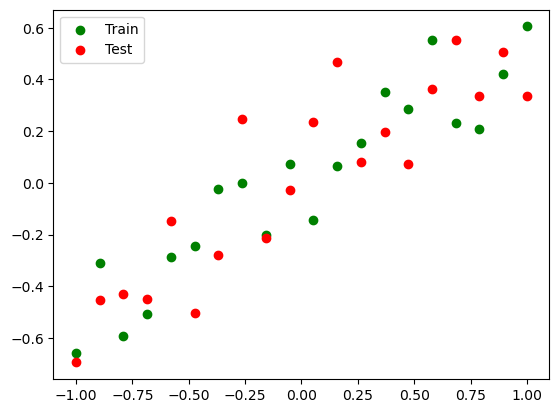

In [11]:
plt.scatter(X_train , y_train , c= 'green',label = 'Train')
plt.scatter(X_test, y_test , c= 'red',label = 'Test')
plt.legend()

 # Regression Model

In [21]:
model = Sequential()
model.add(Dense(128,input_dim = 1 ,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(1,activation ="linear"))
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer= adam,metrics=['mse'])
history = model.fit(X_train , y_train, epochs = 500 , validation_data =(X_test,y_test),verbose= 1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1074 - mse: 0.1074 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 0.0171 - ms

In [24]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse   = model.evaluate(X_test, y_test, verbose=0)

print(f"Train MSE: {train_mse[1]}, Test MSE: {test_mse[1]}")


Train MSE: 0.0033709995914250612, Test MSE: 0.046139709651470184


In [25]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


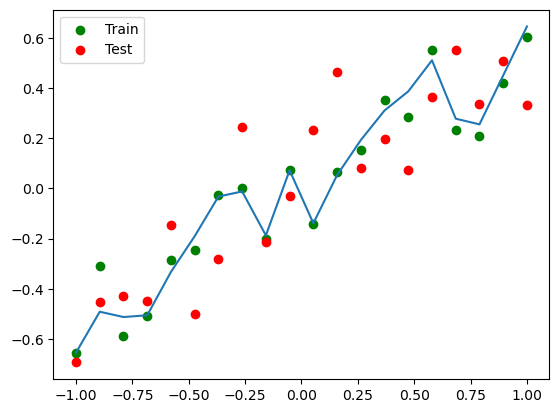

In [26]:
# Regression curve  - to check the overfitting 
plt.scatter(X_train , y_train , c= 'green',label = 'Train')
plt.scatter(X_test, y_test , c= 'red',label = 'Test')
plt.plot(X_test , y_pred)
plt.legend()

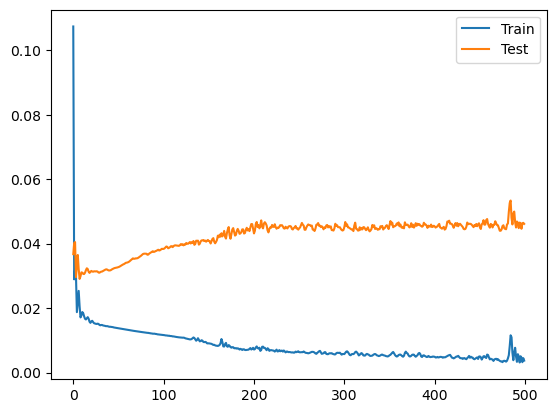

In [29]:
# another way to check the overfitting 
plt.plot(history.history['loss'],label = 'Train')
plt.plot(history.history['val_loss'],label = 'Test')
plt.legend()

# Drop Out Method to Solve the Overfitting 

In [30]:
model = Sequential()
model.add(Dense(128,input_dim = 1 ,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation ="linear"))
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer= adam,metrics=['mse'])
history = model.fit(X_train , y_train, epochs = 500 , validation_data =(X_test,y_test),verbose= 1)

Epoch 1/500


C:\Users\Charanjot Kaur\anaconda3\envs\digit_ann\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1380 - mse: 0.1380 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0517 - mse: 0.0517 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.0229 - mse: 0.0229

In [31]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


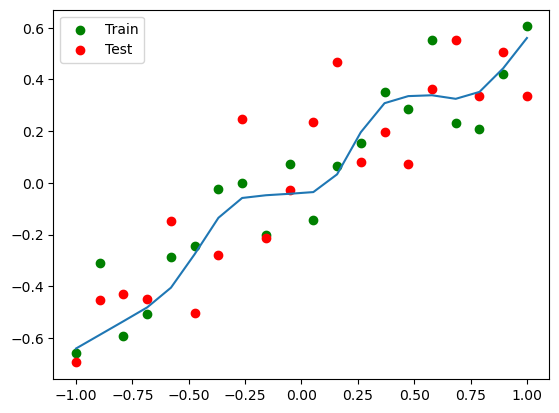

In [32]:
# Regression curve  - to check the overfitting - now after dropout its gets smoothen
plt.scatter(X_train , y_train , c= 'green',label = 'Train')
plt.scatter(X_test, y_test , c= 'red',label = 'Test')
plt.plot(X_test , y_pred)
plt.legend()

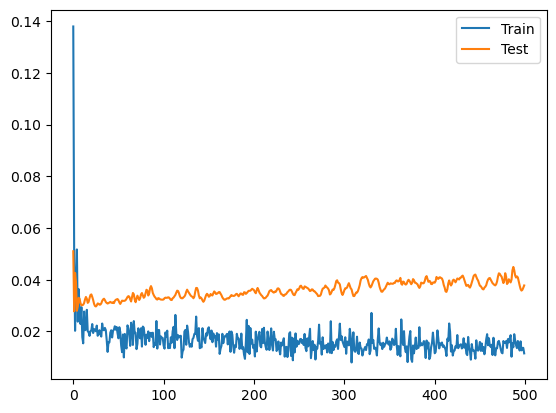

In [33]:
# another way to check the overfitting - gap Reduced 
plt.plot(history.history['loss'],label = 'Train')
plt.plot(history.history['val_loss'],label = 'Test')
plt.legend()

## instead of taking Droupouts - 0.2 this time It is 0.5 : Observation :
- gap reduced between the training loss and the testing loss
- Curve gets more smoothen
## why ? 
- Half of the neurons are randomly disabled in each training step Model cannot memorize training data
- Forces network to learn general patterns, not noise
- This reduces overfitting

In [34]:
# If We take drop out 0.5 
model = Sequential()
model.add(Dense(128,input_dim = 1 ,activation ="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation ="linear"))
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer= adam,metrics=['mse'])
history = model.fit(X_train , y_train, epochs = 500 , validation_data =(X_test,y_test),verbose= 1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1580 - mse: 0.1580 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0660 - mse: 0.0660 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0393 - mse: 0.0393 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0264 - 

In [35]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


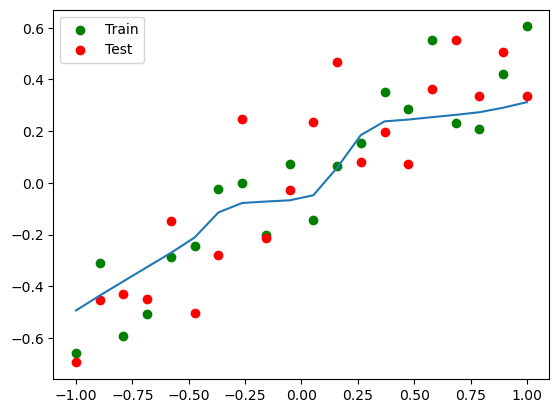

In [36]:
# Regression curve  - to check the overfitting - now after dropout its gets smoothen
plt.scatter(X_train , y_train , c= 'green',label = 'Train')
plt.scatter(X_test, y_test , c= 'red',label = 'Test')
plt.plot(X_test , y_pred)
plt.legend()

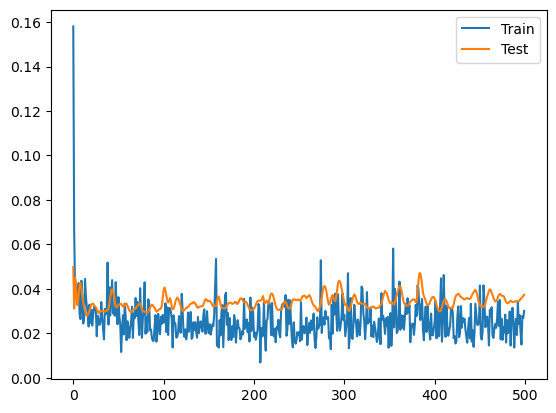

In [37]:
# another way to check the overfitting - gap Reduced 
plt.plot(history.history['loss'],label = 'Train')
plt.plot(history.history['val_loss'],label = 'Test')
plt.legend()